In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [2]:
def hundred_points(interval=30,two_point_percentatge=1.,three_point_percentage=1.,flag=False):
    total_seconds = 24 * 60
    attempts = math.floor(total_seconds / interval)
    print('total attempts = % d'%attempts)
    two_point_attempts = np.arange(0,attempts + 1, 1)
    three_point_attempts = attempts - two_point_attempts
    scores = two_point_attempts * 2 * two_point_percentatge + three_point_attempts * 3 * three_point_percentage
    if flag:
        fig,ax = plt.subplots(figsize=(16,8))
        ax.plot(two_point_attempts,scores,'-*')
        ax.axhline(100,linestyle = '--')
        _=ax.set(xticks=two_point_attempts,xlabel='two-point attempts',ylabel='Total score if make all shots',
                title='at least take % d 3 pts'% (attempts - two_point_attempts[abs(scores - 100) <0.5][0]))
    return [[(0,100),(two_point_attempts[-1],100)],[(two_point_attempts[0],scores[0]),(two_point_attempts[-1],scores[-1])],attempts]
    #return scores,two_point_attempts

total attempts =  48


[[(0, 100), (48, 100)], [(0, 100.8), (48, 67.199999999999989)], 48]

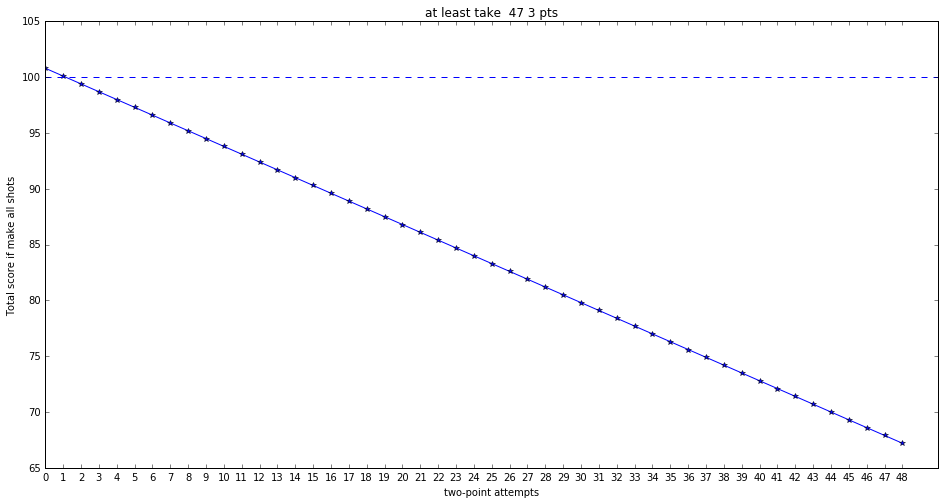

In [3]:
hundred_points(30,.7,.7,True)

In [4]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    if ((l2[1][1] - l2[0][1]) < 0).astype(int):
        if (x > line1[1][0]) :
            return 'over' # should be 'always'
        elif x < 0:
            return 'less' # should be 'never'
        else:
            return x, y
    else:
        if (x > line1[1][1]) :
            return 'less' # should be 'never'
        elif x < 0:
            return 'over' # should be 'always'
        else:
            return x, y


In [5]:
result = []
intervals = np.arange(10,60,1)
two_point_ptgs = np.arange(.36,.86,0.05)
three_point_ptgs = np.arange(.33,.86,0.03)
for interval in intervals:
    for two_point_ptg in two_point_ptgs:
        for three_point_ptg in three_point_ptgs:
            try:
                l1,l2,attempts=hundred_points(interval,two_point_ptg,three_point_ptg)
                slope = ((l2[1][1] - l2[0][1]) > 0).astype(int)
                result.append([interval,two_point_ptg,three_point_ptg,line_intersection(l1,l2)[0],slope,attempts])
            except:
                pass

total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total attempts =  144
total atte

In [6]:
for item in result:
    print(item)

[10, 0.35999999999999999, 0.33000000000000002, 'o', 0, 144]
[10, 0.35999999999999999, 0.35999999999999999, 'o', 0, 144]
[10, 0.35999999999999999, 0.38999999999999996, 'o', 0, 144]
[10, 0.35999999999999999, 0.41999999999999993, 'o', 0, 144]
[10, 0.35999999999999999, 0.4499999999999999, 'o', 0, 144]
[10, 0.35999999999999999, 0.47999999999999987, 'o', 0, 144]
[10, 0.35999999999999999, 0.50999999999999979, 'o', 0, 144]
[10, 0.35999999999999999, 0.53999999999999981, 'o', 0, 144]
[10, 0.35999999999999999, 0.56999999999999984, 'o', 0, 144]
[10, 0.35999999999999999, 0.59999999999999976, 'o', 0, 144]
[10, 0.35999999999999999, 0.62999999999999967, 'o', 0, 144]
[10, 0.35999999999999999, 0.6599999999999997, 'o', 0, 144]
[10, 0.35999999999999999, 0.68999999999999972, 'o', 0, 144]
[10, 0.35999999999999999, 0.71999999999999964, 'o', 0, 144]
[10, 0.35999999999999999, 0.74999999999999956, 'o', 0, 144]
[10, 0.35999999999999999, 0.77999999999999958, 'o', 0, 144]
[10, 0.35999999999999999, 0.80999999999999

In [7]:
intersect=[]
for item in result:
    if (item[-3] is 'l') or (item[-3] is 'o') :
        pass
    else:
        intersect.append([item[0],item[1],item[2],int(item[-3]),item[-2],item[-1]])

import pandas as pd
intersect = pd.DataFrame(intersect,
                         columns=['interval','two_point_ptg','three_point_ptg','taking_twos','slop','all_attempts'])
intersect['minimum_threes'] = intersect['all_attempts'] - intersect['taking_twos']
intersect = intersect[intersect['minimum_threes'] > 0]

In [ ]:
fig,ax=plt.subplots(figsize=(18,6))
ax.pcolor(intersect.corr(),cmap=plt.cm.Blues)
ax.set(xticks=np.arange(len(intersect.columns)) +0.5,yticks=np.arange(len(intersect.columns)) +0.5,
       xticklabels=intersect.columns,yticklabels=intersect.columns)

In [ ]:
len(intersect[intersect['interval']==25])

In [25]:
intersect['eFG%']=((intersect['two_point_ptg']*intersect['taking_twos']+
                    intersect['three_point_ptg']*intersect['minimum_threes'])+
                 0.5 * intersect['three_point_ptg']*intersect['minimum_threes'])/intersect['all_attempts']

In [26]:
intersect.head()

,interval,two_point_ptg,three_point_ptg,taking_twos,slop,all_attempts,minimum_threes,eFG%
0,11,0.36,0.33,106,0,130,24,0.384923
1,11,0.36,0.36,112,0,130,18,0.384923
2,11,0.36,0.39,115,0,130,15,0.385962
3,11,0.36,0.42,118,0,130,12,0.384923
4,11,0.36,0.45,119,0,130,11,0.386654


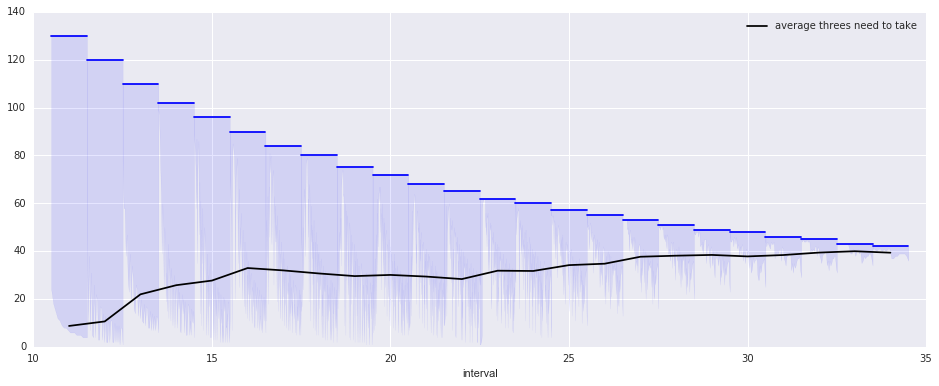

In [34]:
plt.close('all')
fig,ax = plt.subplots(figsize=(16,6))
yy=[]
for interval in pd.unique(intersect['interval'])[:-2]:
    temp_df = intersect[intersect['interval']==interval]
    temp_df=temp_df.sort_values(by=['three_point_ptg'])
    xx = np.linspace(interval - 0.5, interval + 0.5,len(temp_df))
    ax.fill_between(xx,temp_df['all_attempts']-temp_df['taking_twos'],
                 temp_df['all_attempts'],temp_df['minimum_threes'],alpha=0.1,color='blue')
    ax.plot(xx,temp_df['all_attempts'],alpha=1.,color='b',label='')
    yy.append(np.mean(temp_df['all_attempts']-temp_df['taking_twos']))
ax.plot(pd.unique(intersect['interval'])[:-2],yy,alpha=1.,color='k',label='average threes need to take')
ax.set(xlabel='interval')
ax.legend(loc='best')

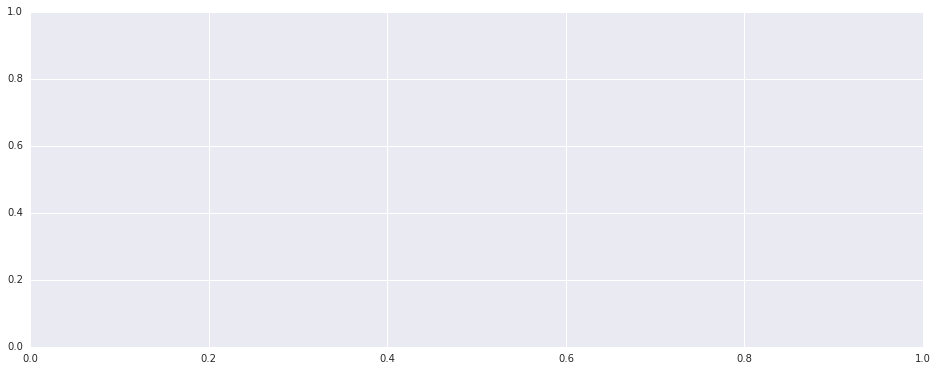

In [32]:
fig,ax = plt.subplots(figsize=(16,6))
ys=[]
for interval in pd.unique(intersect['interval'])[:-2]:
    temp_df = intersect[intersect['interval']==interval]
    


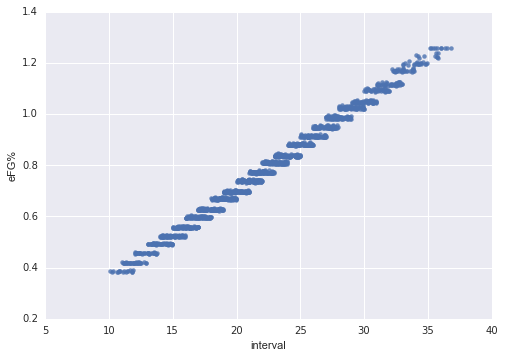

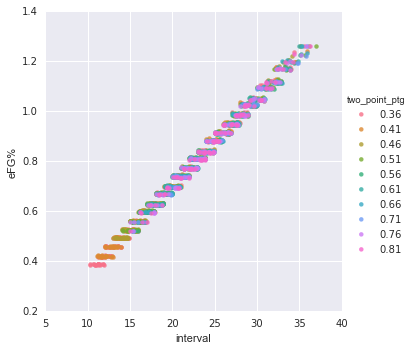

In [51]:
sns.regplot(x='interval', y="eFG%", data=intersect, x_jitter=1.,fit_reg=False)
sns.lmplot(x='interval', y="eFG%",hue='two_point_ptg', data=intersect, x_jitter=1.,fit_reg=False)